In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
import sys
from scipy import interpolate
from glob import glob
from scipy.stats import gaussian_kde

In [4]:
root_dir = abspath(join(pardir, pardir))
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number/metal',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/Thesis-Project']

In [5]:
from utils import compjk, safe_mkdir

In [6]:
root_data_dir = join(root_dir, 'Data')
name = 'metal'
spectral_dir = join(root_data_dir, 'Cluster', name)
spectral_files = glob(join(spectral_dir, '*.hdf5'))
spectral_files.sort()
spectral_files

['/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(-0.00)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(0.14)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(0.33)_(0.37).hdf5']

In [7]:
data_dir = join(root_data_dir, 'Effective-Completeness')
safe_mkdir(data_dir)
data_dir = join(root_data_dir, 'Effective-Completeness', name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Completeness already exist. Good to go!
Directory /home2/s20321005/Thesis-Project/Data/Effective-Completeness/metal already exist. Good to go!


In [8]:
coef_path = join(root_data_dir, "Completeness", f"coefficients-{name}.hdf5")
coef_path

'/home2/s20321005/Thesis-Project/Data/Completeness/coefficients-metal.hdf5'

# testing

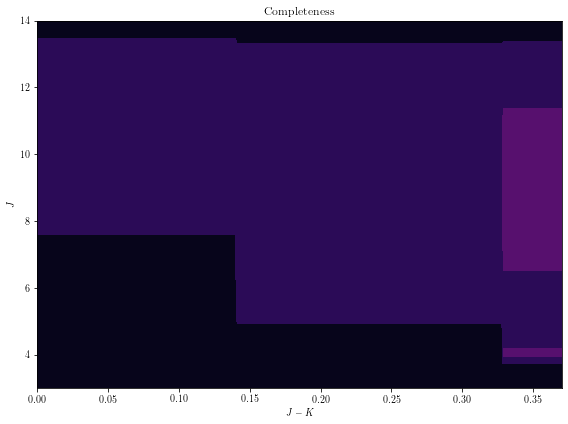

In [10]:
j = np.linspace(3, 14, 300)
jk = np.linspace(0, 0.37, 300)
K, J = np.meshgrid(jk, j)

comp = np.empty_like(K)
comp_fun = compjk(coef_path)
for i, (j, jk) in enumerate(zip(J, K)):
    comp[i] = comp_fun.interp(j, jk)

fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(K, J, comp, levels=np.linspace(0, 1, 11), cmap='inferno')
ax.set_xlabel(r'$J-K$')
ax.set_ylabel(r'$J$')
ax.set_title('Completeness')
fig.tight_layout()

In [34]:
np.isnan(comp).sum()

0

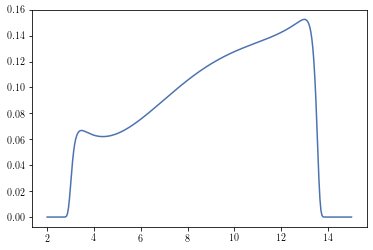

In [12]:
J = np.linspace(2, 15, 300)
JK = np.repeat(0.1, len(J))

comp = comp_fun.interp(J, JK)

plt.plot(J, comp)

# load clean data

ex. first file

In [13]:
index = 0
gaia = vaex.open(spectral_files[index])
gaia = gaia.filter("abs(z) > 100").filter("abs(z) < 200")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal
0,0.2201629876964979,0.2702504814768162,7.997000217437744,7.894999980926514,AAA,2778150740165184128,16.998252868652344,-11.075251542961906,0.04176903888583183,-12.894936481474414,0.029159042984247208,5.914871851212826,0.03481418639421463,8.508554458618164,8.6373929977417,8.261209487915039,3396.260009765625,4012.212890625,1.3601963520050049,1.1726996898651123,-1.002114300788497,-0.8270582585381293,173.48899841308594,172.55419921875,174.42539978027344,0.042100001126527786,0.03869999945163727,0.04560000076889992,0.27000001072883606,0.18000000715255737,0.3499999940395355,A,00502745+1529031,1,111,--,5.8800530433654785,apogee,0.045102618634700775,0.045102618634700775,1.0,7391.5791015625,gspphot,7.9814453125,8.3759765625,0.0,4.069699764251709,gspphot,0.004599571228027344,0.004500389099121094,0.0,-0.0078103989362716675,apogee,0.004705278668552637,0.004705278668552637,1.0,-0.04127899929881096,apogee,0.005884386133402586,0.005884386133402586,1.0,-0.25,gspspec,0.02000001072883606,0.030000001192092896,0.0,-0.11557470262050629,apogee,0.01113793533295393,0.01113793533295393,1.0,0.10200023651123047,1.8567269166835105,169.06537033341695,-124.42245402978985,114.46463374850877,-11.147579253592994,-12.832461197525705,0.0417687004149701,0.02915952782278522,0.045102618634700775,-10.283547574035723,-8.933333974293324,-0.06488174305961354,-0.06233051181031162,-11.28979360122078,0.05505834252411959,-3.5870510091274106,0.05667861773771209,5.5956238249226775,0.06074559154961431,-7.833286975995648,0.058374065461303234,0.6727944269991919,2.2785075109875415,-0.04127899929881096
1,0.5662548145032581,0.22996173735609207,7.258999824523926,7.198999881744385,AAA,74117327209628288,10.993607521057129,-10.479117231994195,0.04243909567594528,3.3237802763638196,0.031028585508465767,6.032688056101913,0.041464757174253464,7.69224214553833,7.7952094078063965,7.490442276000977,610.977294921875,1528.1343994140625,1.0398861169815063,1.1665147542953491,-0.5122464886561988,-0.793040752195522,166.28309631347656,164.095703125,167.7216033935547,0.12319999933242798,0.11640000343322754,0.1298999935388565,nan,nan,nan,A,02094656+1310330,1,111,--,17.406938552856445,apogee,0.0658486932516098,0.0658486932516098,1.0,7818.31884765625,gspphot,15.78759765625,17.7333984375,0.0,3.950900077819824,gspphot,0.006200075149536133,0.008199930191040039,0.0,-0.07806000113487244,apogee,0.005174000281840563,0.005174000281840563,1.0,-0.09969999641180038,gspphot,0.023700006306171417,0.022899992763996124,0.0,-0.07000000029802322,gspspec,0.020000003278255463,0.030000001192092896,0.0,-0.11949469894170761,apogee,0.011420090682804585,0.011420090682804585,1.0,0.059999942779541016,1.161554169474761,165.76358510507188,-118.10493061468055,116.31333333452318,-10.897991289861372,-1.4467892498662314,0.04061465269326403,0.033381131602355084,0.0658486932516098,-1.1367703717797015,-8.562763105527008,-0.02736728138213866,-0.06694960890998258,-13.199924578065803,0.050694405748574235,11.404198691466688,0.05015072999461402,14.137343659026367,0.054659609547700244,-1.8740795240362704,0.06332197830362893,0.4990512609302807,2.129281894904255,-0.09969999641180038
2,2.751526226534777,0.11564005335658553,7.605000019073486,7.535999774932861,AAA,3862318648816143744,39.608

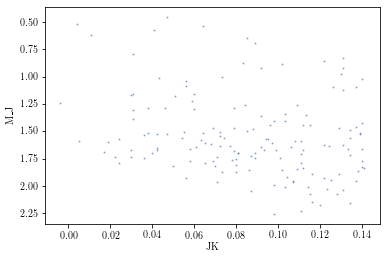

In [14]:
# plot the hr diagram of JK and M_J
gaia.viz.scatter('JK', 'M_J', s=1, alpha=0.5)
xmean = np.mean(gaia['JK'].to_numpy())
xstd = np.std(gaia['JK'].to_numpy())
xrange = xmean - 3*xstd, xmean + 3*xstd
ymean = np.mean(gaia['M_J'].to_numpy())
ystd = np.std(gaia['M_J'].to_numpy())
yrange = ymean - 3*ystd, ymean + 3*ystd
plt.gca().invert_yaxis()


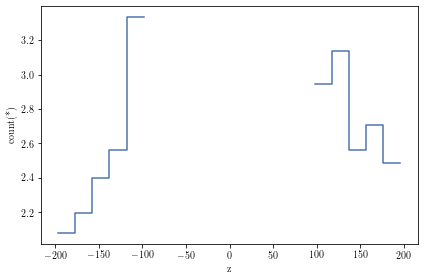

In [15]:
gaia.viz.histogram('z', shape=20, f="log")

In [153]:
# # use scipy kde to estimate the 2D kde estimate of the data
# # cut the middle plane of 30 degree
# gaia_filt = gaia.filter("abs(GLAT) > 30*3.14/180")
# gaia_filt = gaia_filt.extract()
# x = gaia_filt['JK'].to_numpy()
# y = gaia_filt['M_J'].to_numpy()
# k = gaussian_kde(np.vstack([x, y]))
# xi, yi = np.mgrid[-0.2:0.25:100j, -2:4:100j]
# zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [16]:
# use scipy kde to estimate the 2D kde estimate of the data
x = gaia['JK'].to_numpy()
y = gaia['M_J'].to_numpy()
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[xrange[0]:xrange[1]:100j, yrange[0]:yrange[1]:100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

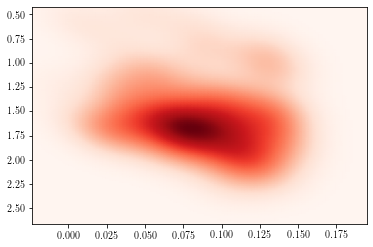

In [17]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds)
# gaia_filt.viz.scatter('JK', 'M_J', s=1, alpha=0.1)
plt.gca().invert_yaxis()
plt.show()

In [18]:
Num = 10000
jks = np.random.uniform(xrange[0], xrange[1], Num)
mjs = np.random.uniform(yrange[0], yrange[1], Num)
Djk = xrange[1] - xrange[0]
Dmj = yrange[1] - yrange[0]
# do monte carlo integration
z = k(np.vstack([jks, mjs]))*Djk*Dmj/Num
z.sum()

0.9804825852517306

In [19]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

100%|██████████| 100/100 [00:16<00:00,  6.19it/s]


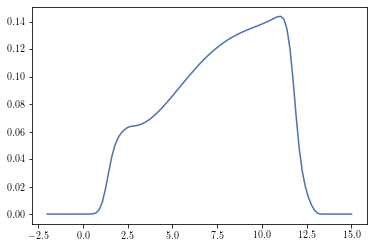

In [20]:
from tqdm import tqdm

DM = np.linspace(-2, 15, 100)

compDM = []
for dm in tqdm(DM):
    tot = k(np.vstack([jks, mjs]))*Djk*Dmj/Num*comp_fun.interp(dm + mjs, jks)
    compDM.append(tot.sum())
compDM = np.array(compDM)
plt.plot(DM, compDM)
plt.show()

In [21]:
df_comp = vaex.from_arrays(DM=DM, compDM=compDM)
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,0.0
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


In [22]:
name = spectral_files[index].split("/")[-1]
index, name

(0, 'gaia_(-0.00)_(0.14).hdf5')

In [23]:
data_dir

'/home2/s20321005/Thesis-Project/Data/Effective-Completeness/metal'

In [24]:
df_comp.export(join(data_dir, name), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [25]:
spectral_files

['/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(-0.00)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(0.14)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(0.33)_(0.37).hdf5']

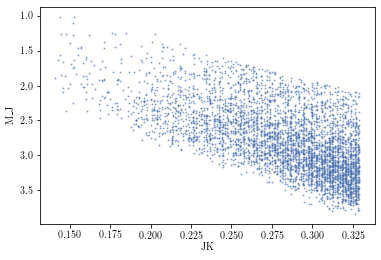

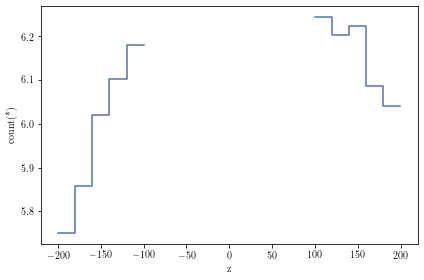

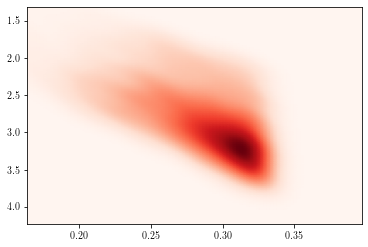

100%|██████████| 100/100 [01:53<00:00,  1.13s/it]


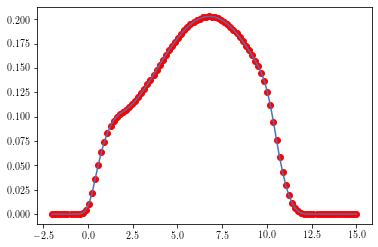

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

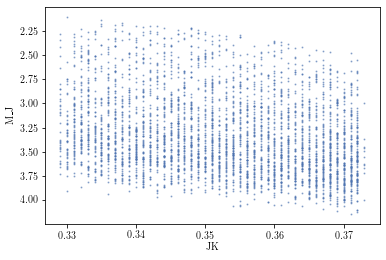

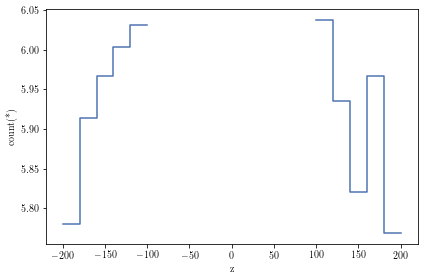

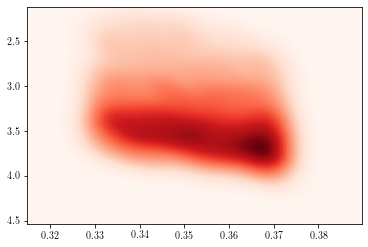

100%|██████████| 100/100 [01:37<00:00,  1.03it/s]


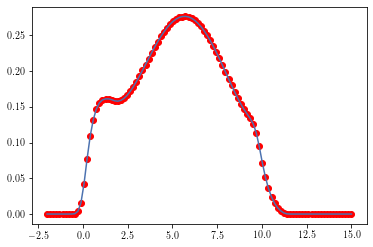

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [26]:
for file in spectral_files[1:]:
    gaia_raw = vaex.open(file)
    gaia = gaia_raw.filter("abs(z) > 100").filter("abs(z) < 200")
    gaia = gaia.extract()

    # plot the hr diagram of JK and M_J
    xmean = np.mean(gaia['JK'].to_numpy())
    xstd = np.std(gaia['JK'].to_numpy())
    xrange = xmean - 3*xstd, xmean + 3*xstd
    ymean = np.mean(gaia['M_J'].to_numpy())
    ystd = np.std(gaia['M_J'].to_numpy())
    yrange = ymean - 3*ystd, ymean + 3*ystd

    gaia.viz.scatter('JK', 'M_J', s=1, alpha=0.5)
    plt.gca().invert_yaxis()
    plt.show()

    gaia.viz.histogram('z', shape=20, f="log", show=True)

    # use scipy kde to estimate the 2D kde estimate of the data
    x = gaia['JK'].to_numpy()
    y = gaia['M_J'].to_numpy()
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[xrange[0]:xrange[1]:100j, yrange[0]:yrange[1]:100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds)
    # gaia_filt.viz.scatter('JK', 'M_J', s=1, alpha=0.1)
    plt.gca().invert_yaxis()
    plt.show()
    # calculate effective completeness, using monte carlo integration

    Num = 10000
    jks = np.random.uniform(xrange[0], xrange[1], Num)
    mjs = np.random.uniform(yrange[0], yrange[1], Num)
    Djk = xrange[1] - xrange[0]
    Dmj = yrange[1] - yrange[0]

    DM = np.linspace(-2, 15, 100)

    compDM = []
    for dm in tqdm(DM):
        tot = k(np.vstack([jks, mjs]))*Djk*Dmj/Num*comp_fun.interp(dm + mjs, jks)
        compDM.append(tot.sum())
    compDM = np.array(compDM)
    plt.plot(DM, compDM)
    plt.scatter(DM, compDM, c="r")
    plt.show()

    df_comp = vaex.from_arrays(DM=DM, compDM=compDM)
    df_comp.export(join(data_dir, file.split("/")[-1]), progress=True)